In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from Bio import SeqIO

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import logomaker
import pandas as pd
from scipy.stats import entropy
from scipy.stats import pearsonr
import random
from scipy.spatial.distance import pdist, cdist
import time

In [14]:
PATH = "/home/fefe/Documents/Stage/code/pl/"

# natural sequences
msa1_file = PATH + "data/PF13354_has_hehe.faa"
# msa1_file = PATH + "RR_sub_msa.faa"


# generated sequences
#msa2_file = PATH + "Generated/equil_det_bal_pf13354_silico_chain_num_3_T_1.0.mixedDNA"
# msa2_file = PATH + "Keddis/generation_v1_autoencoder_15_750_100_.txt"
# msa2_file = PATH + "Keddis/generation_v1_autoencoder_50_2500_100_.txt"
# msa2_file = PATH + "Keddis/generation_v2_autoencoder_4_4000_100_.txt"
# msa2_file = PATH + "Keddis/generation_v2_autoencoder_4_4000_200_.txt"
# msa2_file = PATH + "Keddis/generation_v2_autoencoder_8_8000_100_.txt"
# msa2_file = PATH + "Keddis/generation_v2_autoencoder_8_8000_200_.txt"
msa2_file = PATH + "Generated/gen.faa"

In [15]:
# PCA of input and generated sequences

# Function to read sequences from a FASTA file
def read_fasta(file_path):
    sequences = [str(record.seq) for record in SeqIO.parse(file_path, "fasta")]
    return sequences

# Function to create one-hot encoding of sequences
def one_hot_encode(sequences, alphabet="ACDEFGHIKLMNPQRSTVWY-"):
    """ Encodes sequences into a binary matrix (num_sequences, seq_length * alphabet_size). """
    
    # Convert sequences into a list of character lists
    sequences_list = [list(seq) for seq in sequences]

    print(len(sequences), len(sequences[0]))
    # Fit OneHotEncoder on the alphabet
    encoder = OneHotEncoder(categories=[list(alphabet)], sparse_output=False, handle_unknown='ignore')
    encoded = encoder.fit_transform(np.array(sequences_list).reshape(-1, 1))

    # Reshape to (num_sequences, seq_length * alphabet_size)
    encoded = encoded.reshape(len(sequences), len(sequences[0]) * len(alphabet))
    
    return encoded

# Load MSA 1 and one-hot encode
t = time.time()
msa1_sequences = read_fasta(msa1_file)
print(time.time() - t)
msa1_encoded = one_hot_encode(msa1_sequences)
print(time.time() - t)



0.28995180130004883
18334 202
6.594310283660889


In [11]:
msa2_sequences

['MLFSPCVQH',
 'ALSVPVVRQ',
 'ALSSPRVQQ',
 'ALMTP-YFH',
 'ALLEPTTQT',
 'ALWVPRVQQ',
 'ALQP-R-CF',
 'MLQEIII-T',
 'ALFHVNHSQ',
 'ALSEFVCSV',
 'ALLPEFYQQ',
 'ALMWPVNCC',
 'ALLVPF-CQ',
 'AKWFPWFQH',
 'ALWPPQVCQ',
 'MLMHPTYRQ',
 'ALVSPVWQI',
 'ALQPPCKSQ',
 'ALNPEPYLQ',
 'ALSFPHRCS',
 'ALMLPLVLQ',
 'ALFPEVYQV',
 'ALLF-LWSQ',
 'ALKFEPKHQ',
 'ALSRPVVRQ',
 'MLMCEVCQP',
 'ALSFPGVFH',
 'MLVTEPVEH',
 'ALSEPQYTH',
 'ALFRCH-HT',
 'ALVHWTTSL',
 'MLEWETWQQ',
 'MLVQPVVFQ',
 'ALSPPWMPQ',
 'MLNRCSTWA',
 'ALSFCQKIT',
 'MLFHEFSFQ',
 'ALWVPSVQQ',
 'ALPWPSMCS',
 'ALVHVLMRP',
 'ALTSTLFCS',
 'ALTPPPGLQ',
 'MLQHPTVMK',
 'MLCFMFTCV',
 'ALQCPVWFH',
 'ALWVPCCFQ',
 'ALWLPLVQQ',
 'ALSCPTTFQ',
 'MLVGMHRTQ',
 'ALWHMRVFQ',
 'ALNFPEGHH',
 'ALCHKTTQC',
 'ALVHCL-MA',
 'ALQHEHCQQ',
 'MLFHHCRQR',
 'MLSWEFMSQ',
 'ALQFERHQQ',
 'ALKPPFRSQ',
 'MLFHECYLQ',
 'ALVHWS-TA',
 'MLHHIF-FC',
 'ALLHPFVLQ',
 'MLFTEFECQ',
 'ALLHEQHVP',
 'ML-HP-TSH',
 'ALKR-VRCR',
 'MLIEEETQQ',
 'ALMHII-WA',
 'ALSFPVVQQ',
 'MLLVETVTQ',
 'ALWFPLWLH',
 'MLRV

100 202
Explained variance by each PC: [0.07883604 0.02368209 0.02072946 0.01925422 0.01750145]
Cumulative explained variance: [0.07883604 0.10251813 0.12324759 0.14250181 0.16000326]


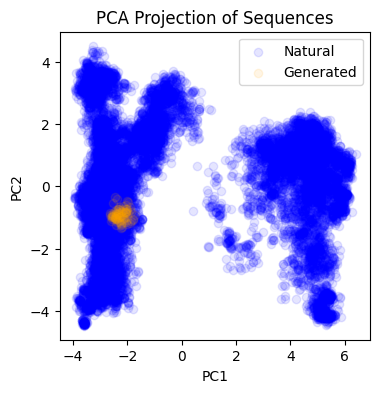

In [16]:
# Perform PCA on MSA 1
pca = PCA(n_components=5)
msa1_pca = pca.fit_transform(msa1_encoded)

# Load MSA 2 and project it into MSA 1 PCA space
msa2_sequences = read_fasta(msa2_file)
msa2_encoded = one_hot_encode(msa2_sequences)
msa2_pca = pca.transform(msa2_encoded)  # Use the same PCA transformation

# variance explained by each PC
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each PC:", explained_variance)
# cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:", cumulative_variance)

# Plot PCA results
plt.figure(figsize=(4, 4))
plt.scatter(msa1_pca[:, 0], msa1_pca[:, 1], label="Natural", alpha=0.1, c='blue')
plt.scatter(msa2_pca[:, 0], msa2_pca[:, 1], label="Generated", alpha=0.1, c='orange')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Sequences")
plt.legend()
plt.show()


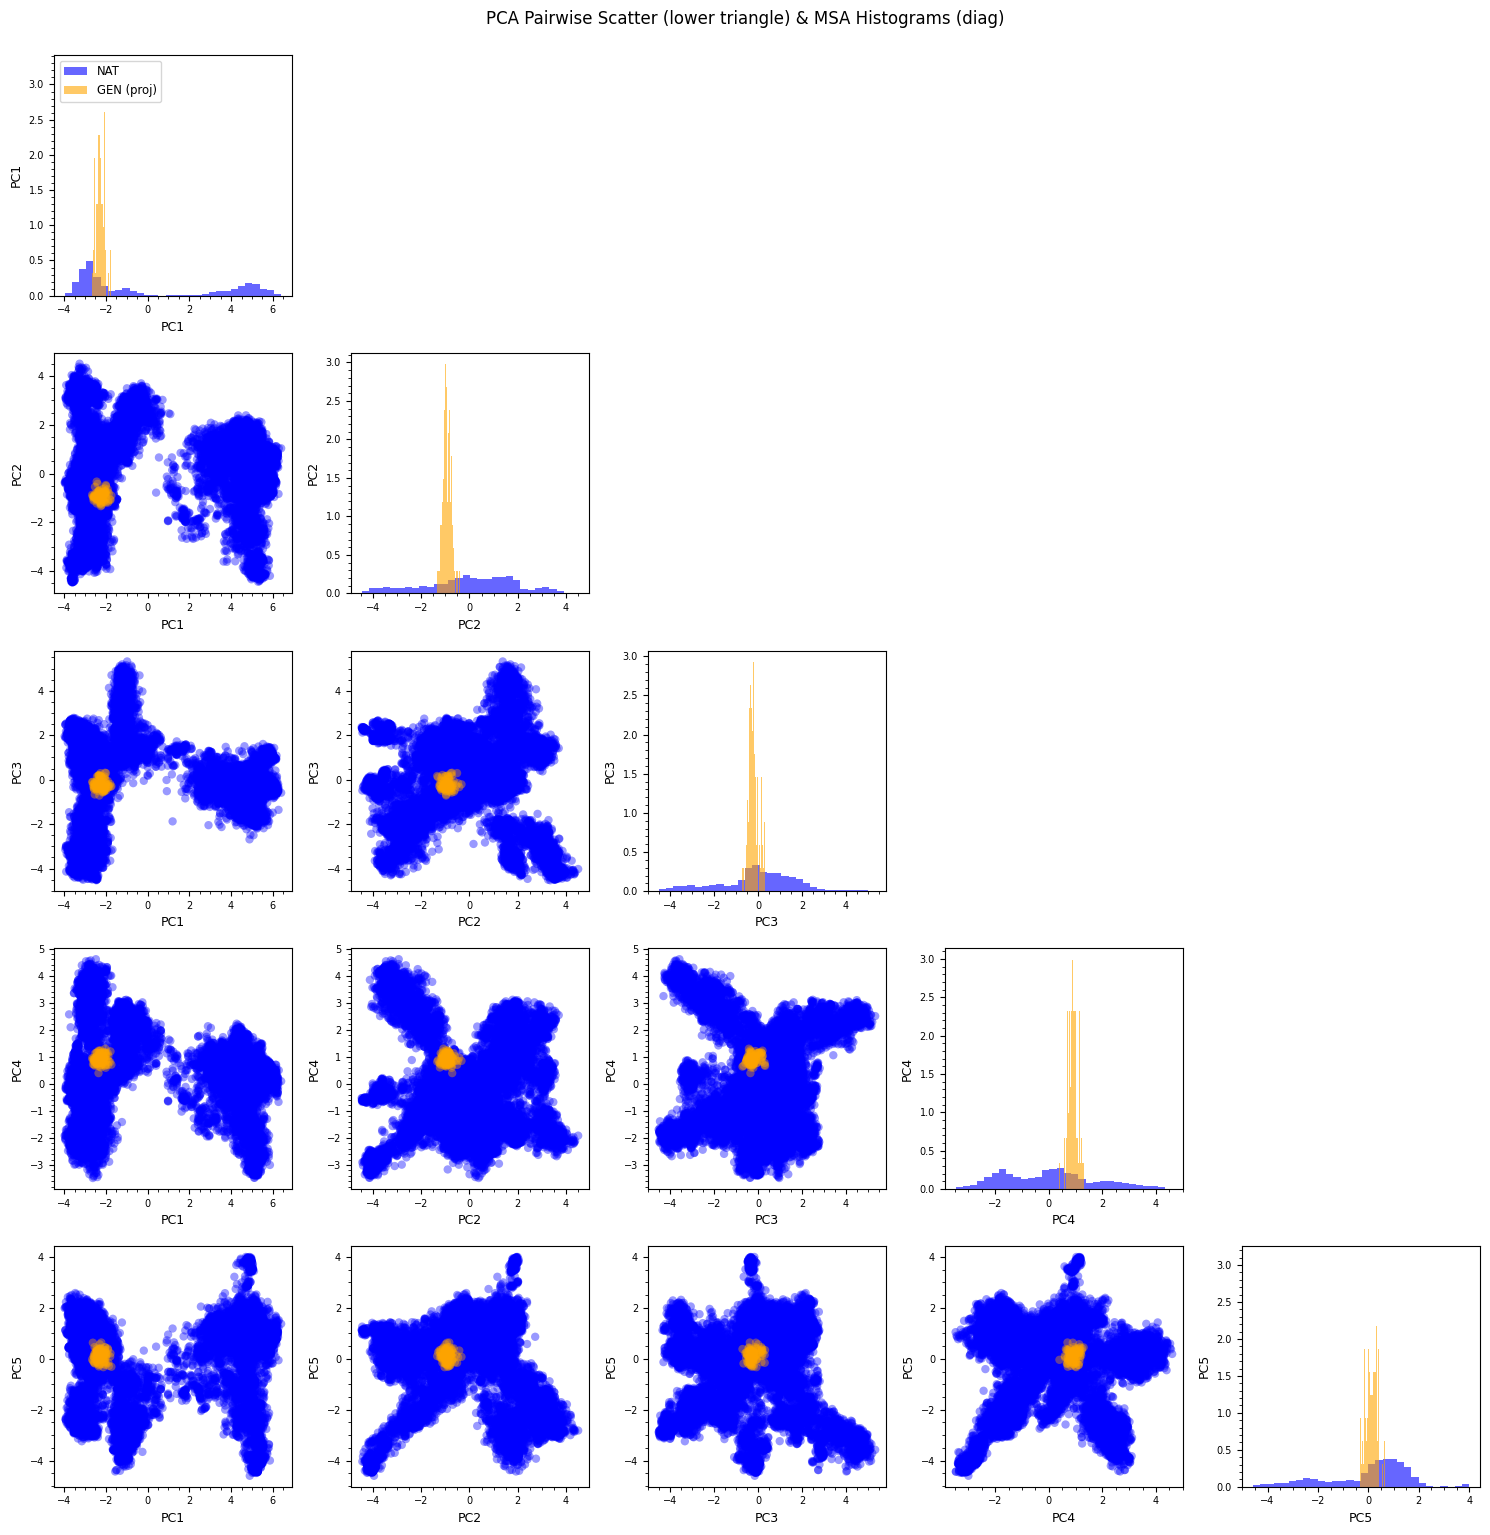

In [17]:
# Plot multi-dimensional PCA of input and generated sequences

# Assuming msa1_pca and msa2_pca are (n_samples, n_components)
data1 = msa1_pca
data2 = msa2_pca

n_components = data1.shape[1]

fig, axes = plt.subplots(
    n_components, n_components,
    figsize=(3*n_components, 3*n_components),
    squeeze=False
)

for i in range(n_components):
    for j in range(n_components):
        ax = axes[i, j]

        if i > j:
            # Lower triangle: scatter PC_j vs PC_i for each dataset
            ax.scatter(
                data1[:, j], data1[:, i],
                label=None,
                alpha=0.4,
                color='blue',
                edgecolors='none'
            )
            ax.scatter(
                data2[:, j], data2[:, i],
                label=None,
                alpha=0.4,
                color='orange',
                edgecolors='none'
            )
            # if i == 1 and j == 0:
            #     # single legend on the first lower‐triangle subplot
            #     ax.legend(loc='upper right', fontsize='small')

        elif i == j:
            # Diagonal: overlaid histograms of PC_i for both datasets
            ax.hist(
                data1[:, i],
                bins=30,
                alpha=0.6,
                color='blue',
                density=True,
                label="NAT"
            )
            ax.hist(
                data2[:, i],
                bins=30,
                alpha=0.6,
                color='orange',
                density=True,
                label="GEN (proj)"
            )
            if i == 0:
                ax.legend(loc='upper left', fontsize='small')

        else:
            # Upper triangle: empty
            ax.axis('off')
            continue

        # Label axes and turn on ticks
        ax.set_xlabel(f"PC{j+1}", fontsize=9)
        ax.set_ylabel(f"PC{i+1}", fontsize=9)
        ax.tick_params(axis='both', which='major', labelsize=7)
        ax.minorticks_on()

plt.tight_layout()
plt.suptitle(
    "PCA Pairwise Scatter (lower triangle) & MSA Histograms (diag)",
    y=1.02
)
plt.show()


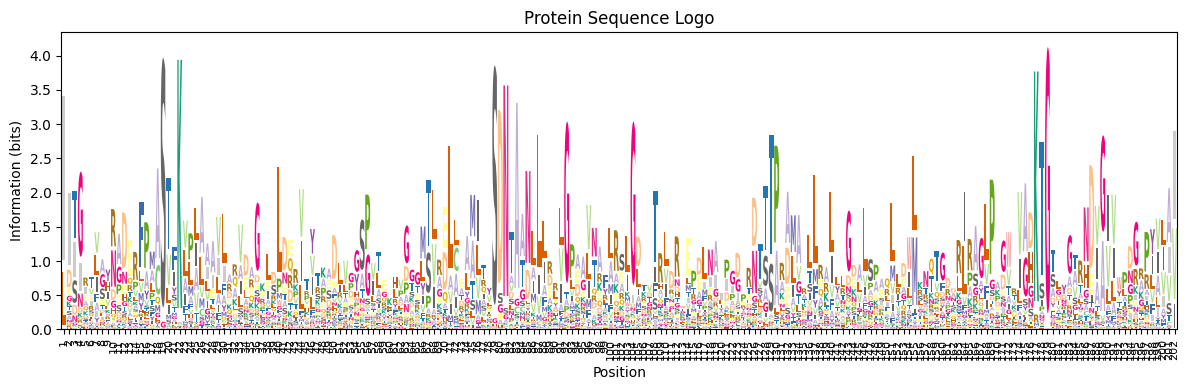

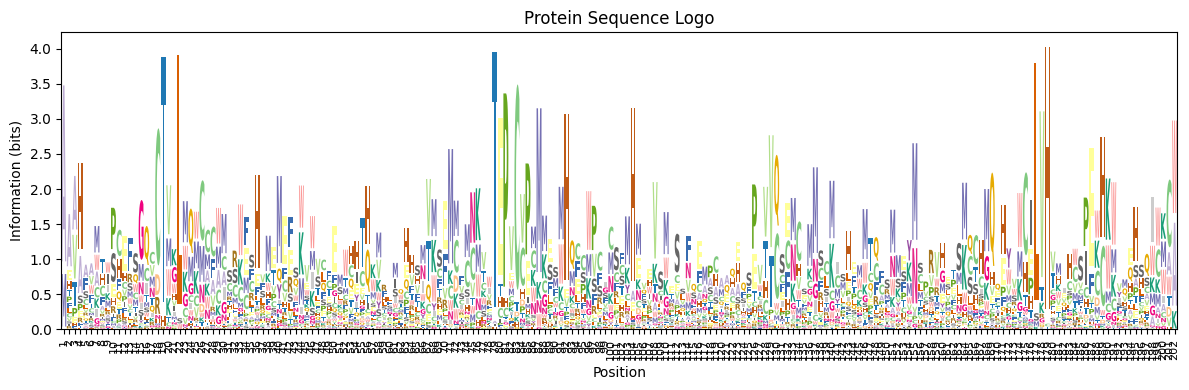

In [18]:
# ## Define colors for amino acids (and gaps)
aa_colors = {
    'A':'#BEAED4','C':'#7FC97F','D':'#FDC086','E':'#FFFF99',
    'F':'#386CB0','G':'#F0027F','H':'#BF5B17','I':'#666666',
    'K':'#1B9E77','L':'#D95F02','M':'#7570B3','N':'#E7298A',
    'P':'#66A61E','Q':'#E6AB02','R':'#A6761D','S':'#666666',
    'T':'#1F78B4','V':'#B2DF8A','W':'#FB9A99','Y':'#984EA3',
    '-':'#CCCCCC'
}

def plot_protein_sequence_logo(fasta_file, output_file=None, figsize=(12,4)):
    # Read aligned sequences
    seqs = [str(rec.seq) for rec in SeqIO.parse(fasta_file, "fasta")]
    L = len(seqs[0])
    if any(len(s)!=L for s in seqs):
        raise ValueError("All sequences must be the same length")

    # Alphabet: 20 AA + gap
    alphabet = list("ACDEFGHIKLMNPQRSTVWY-")

    # Count occurrences
    counts = {aa: [0]*L for aa in alphabet}
    for s in seqs:
        for i, aa in enumerate(s):
            if aa not in counts:
                # treat non‐standard as gap
                counts['-'][i] += 1
            else:
                counts[aa][i] += 1

    # Build freq DataFrame
    df = pd.DataFrame(counts)
    df = df.div(df.sum(axis=1), axis=0)  # normalize per position

    # Information content per column: log2(|alphabet|) − entropy
    info = np.log2(len(alphabet)) - entropy(df.T, base=2)

    # Scale frequencies by info
    df_scaled = df.mul(info, axis=0)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    logo = logomaker.Logo(df_scaled,
                          ax=ax,
                          color_scheme=aa_colors,
                          vpad=0.1, 
                          width=0.9)
    ax.set_xticks(range(L))
    ax.set_xticklabels(range(1, L+1), rotation=90, fontsize=8)
    ax.set_ylabel("Information (bits)")
    ax.set_xlabel("Position")
    ax.set_title("Protein Sequence Logo")
    plt.tight_layout()

    if output_file:
        plt.savefig(output_file, dpi=300)
    plt.show()

# Example usage:
plot_protein_sequence_logo(msa1_file)
plot_protein_sequence_logo(msa2_file)




Pearson correlation between mean vectors: -0.0265


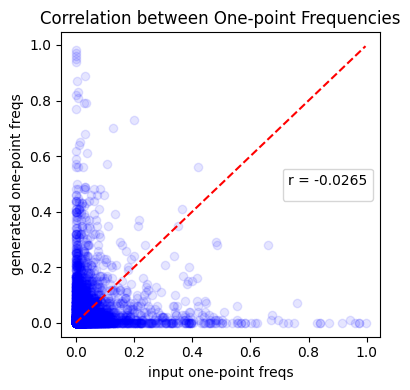

In [19]:
# Compute mean profiles and correlation
x = np.mean(msa1_encoded, axis=0)
y = np.mean(msa2_encoded, axis=0)
p = pearsonr(x, y)
print(f"Pearson correlation between mean vectors: {p[0]:.4f}")

plt.figure(figsize=(4, 4))
plt.scatter(x, y, alpha=0.1, c='blue')

# Add diagonal reference line without legend label
min_val = min(np.min(x), np.min(y))
max_val = max(np.max(x), np.max(y))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

# Add legend showing only the correlation value as title
plt.legend([], [], title=f"r = {p[0]:.4f}", loc='best')

plt.xlabel("input one-point freqs")
plt.ylabel("generated one-point freqs")
plt.title("Correlation between One-point Frequencies")
plt.tight_layout()
plt.show()


Pearson correlation between covariance matrices (excluding diagonal blocks): 0.9617


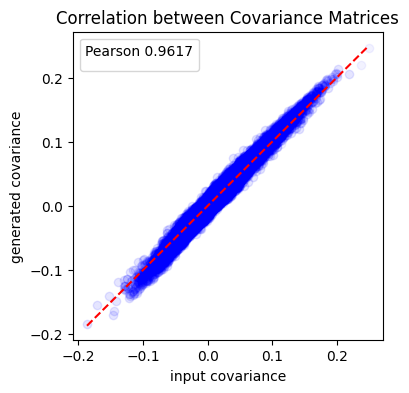

In [13]:
# Correlation between covariance matrices of two MSAs

def compute_covariance(msa_onehot):
    return np.cov(msa_onehot, rowvar=False)  # Covariance across columns

def mask_diagonal_blocks(matrix, alphabet_size):
    L = matrix.shape[0]
    seq_length = L // alphabet_size  # Number of positions in the alignment
    mask = np.ones((L, L), dtype=bool)

    # Remove diagonal blocks (intra-position covariance)
    for i in range(seq_length):
        start = i * alphabet_size
        end = start + alphabet_size
        mask[start:end, start:end] = False  # Block out diagonal blocks

    return matrix[mask]  # Flattened non-diagonal block values

def pearson_between_covariances(msa1_onehot, msa2_onehot, alphabet_size=22):
    # Compute covariance matrices
    cov1 = compute_covariance(msa1_onehot)
    cov2 = compute_covariance(msa2_onehot)

    # Extract only off-diagonal blocks
    cov1_flat = mask_diagonal_blocks(cov1, alphabet_size)
    cov2_flat = mask_diagonal_blocks(cov2, alphabet_size)

    # Compute Pearson correlation
    pearson_corr, _ = pearsonr(cov1_flat, cov2_flat)
    
    return pearson_corr, cov1_flat, cov2_flat

# Compute Pearson correlation between covariance matrices
correlation, c_input, c_gen = pearson_between_covariances(msa1_encoded, msa2_encoded, 22)
print(f"Pearson correlation between covariance matrices (excluding diagonal blocks): {correlation:.4f}")

# Plot scatter of covariance matrices
plt.figure(figsize=(4, 4))
plt.scatter(c_input, c_gen, alpha=0.05, c='blue')

# Add diagonal line for reference
min_val = min(np.min(c_input), np.min(c_gen))
max_val = max(np.max(c_input), np.max(c_gen))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.legend([], [], title=f'Pearson {correlation:.4f}', loc='best')

plt.xlabel("input covariance")
plt.ylabel("generated covariance")
plt.title("Correlation between Covariance Matrices")
plt.show()


In [9]:
from itertools import combinations

def compare_connected_3pt(
    X1, X2,
    n_samples=100,
    gridsize=200
):
   
    #X1: (N1, L*4), X2: (N2, L*4)

    """ Randomly sample n_samples of (i<j<k,a,b,c),
    compute connected 3-pt cumulants on the fly,
    then show scatter + hexbin."""

    # reshape to (N, L, q)
    N1, L4 = X1.shape
    N2, _  = X2.shape
    q      = 21
    L      = L4 // q
    X1r    = X1.reshape(N1, L, q)
    X2r    = X2.reshape(N2, L, q)

    # 1-pt freqs
    f1_1 = X1r.mean(axis=0)   # (L, q)
    f1_2 = X2r.mean(axis=0)
    # 2-pt freqs
    f2_1 = np.einsum('nia,njb->ijab', X1r, X1r) / N1  # (L,L,q,q)
    f2_2 = np.einsum('nia,njb->ijab', X2r, X2r) / N2

    # build list of all i<j<k triples
    triples = np.array(list(combinations(range(L), 3)), dtype=int)  # (M,3)
    M       = len(triples)
    total   = M * (q**3)

    # sample flat indices in [0, total)
    idx      = np.random.choice(total, size=n_samples, replace=False)
    tri_idx  = idx // (q**3)           # which triple (0..M-1)
    abc_idx  = idx %  (q**3)           # which (a,b,c) in base-q³

    # decode (i,j,k) and (a,b,c)
    i = triples[tri_idx, 0]
    j = triples[tri_idx, 1]
    k = triples[tri_idx, 2]
    a = (abc_idx // (q*q)) % q
    b = (abc_idx // q)     % q
    c =  abc_idx           % q

    # on-the-fly f3 by vectorized indexing & mean
    # shape (N1, n_samples)
    v1 = X1r[:, i, a] * X1r[:, j, b] * X1r[:, k, c]
    v2 = X2r[:, i, a] * X2r[:, j, b] * X2r[:, k, c]
    f3_1_samp = v1.mean(axis=0)   # (n_samples,)
    f3_2_samp = v2.mean(axis=0)

    # gather corresponding f1 and f2 for each sampled tuple
    f1i1 = f1_1[i, a]
    f1j1 = f1_1[j, b]
    f1k1 = f1_1[k, c]
    f2jk1= f2_1[j, k, b, c]
    f2ik1= f2_1[i, k, a, c]
    f2ij1= f2_1[i, j, a, b]

    f1i2 = f1_2[i, a]
    f1j2 = f1_2[j, b]
    f1k2 = f1_2[k, c]
    f2jk2= f2_2[j, k, b, c]
    f2ik2= f2_2[i, k, a, c]
    f2ij2= f2_2[i, j, a, b]

    # compute connected cumulants for the sample
    x = ( f3_1_samp
        - f1i1*f2jk1 - f1j1*f2ik1 - f1k1*f2ij1
        + 2*f1i1*f1j1*f1k1 )
    y = ( f3_2_samp
        - f1i2*f2jk2 - f1j2*f2ik2 - f1k2*f2ij2
        + 2*f1i2*f1j2*f1k2 )

    # Pearson r
    r, _ = pearsonr(x, y)

    mn, mx = np.min([x.min(), y.min()]), np.max([x.max(), y.max()])

    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, alpha=0.3, s=2)
    plt.plot([mn, mx], [mn, mx], 'r--')

    plt.xlabel('input C3')
    plt.ylabel('generated C3')
    plt.title(f'Connected 3point corrs (n={n_samples})')

    plt.legend([], [], title=f'Pearson {r:.2f}', loc='best')


    plt.tight_layout()
    plt.show()

    return r

r_value = compare_connected_3pt(msa1_encoded, msa2_encoded)
print(f"Pearson r for connected 3-point correlations: {r_value:.4f}")

MemoryError: Unable to allocate 93.4 GiB for an array with shape (12533837400,) and data type int64

In [ ]:
# Example matrices: adjust dimensions and values as needed.
# Both matrices have the same number of columns (i.e. same "row length").
A = msa1_encoded  # natural sequences
B = msa2_encoded  # generated sequences

# (a) Compute pairwise distances within matrix A.
dist_A = pdist(A, metric="hamming")*B.shape[1]/2  # Returns a condensed distance array
print("ok")
# (b) Compute pairwise distances within matrix B.
dist_B = pdist(B, metric="hamming")*B.shape[1]/2
print("ok")
# (c) Compute pairwise distances between rows of A and rows of B.
dist_AB = cdist(A, B, metric="hamming")*B.shape[1]/2
dist_AB_flat = [elem for row in dist_AB for elem in row]
print("ok")
# plt.show()

# Common bins
all_data = np.concatenate([dist_A, dist_B, dist_AB_flat])
bins = np.linspace(all_data.min(), all_data.max(), 30)
print("ok")
plt.figure(figsize=(4,3))

# Step‐style (outline only), no filling
plt.hist(dist_A,
         bins=bins,
         density=True,
         histtype='step',
         linewidth=2,
         color='C0',            # default “tab:blue”
         label='NAT')

plt.hist(dist_B,
         bins=bins,
         density=True,
         histtype='step',
         linewidth=2,
         color='C1',            # default “tab:orange”
         label='GEN')

plt.hist(dist_AB_flat,
         bins=bins,
         density=True,
         histtype='step',
         linewidth=2,
         color='C2',            # default “tab:green”
         label='NAT ↔ GEN')

plt.yscale('log')
plt.xlabel("Distance")
plt.ylabel("Normalized Frequency (log scale)")
plt.title("Pairwise Distance Distributions")
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
from scipy.spatial.distance import squareform

# # 1. Compute distances
# A = msa1_encoded  # natural sequences
# B = msa2_encoded  # generated sequences

# dist_BA = cdist(B, A, metric="hamming") * B.shape[1] / 2
# min_dist_BA = np.min(dist_BA, axis=1)

# dist_BB = cdist(B, B, metric="hamming") * B.shape[1] / 2
# np.fill_diagonal(dist_BB, np.inf)
# min_dist_BB = np.min(dist_BB, axis=1)

min_dist_BA = np.min(dist_AB.T, axis=1)

dist_BB = squareform(dist_B)
np.fill_diagonal(dist_BB, np.inf)
min_dist_BB = np.min(dist_BB, axis=1)

# 2. Common bins
all_d = np.concatenate([min_dist_BA, min_dist_BB])
bins = np.linspace(all_d.min(), all_d.max(), 15)

# 3. Plot outline histograms
plt.figure(figsize=(4,3))
plt.hist(min_dist_BA,
         bins=bins,
         density=True,
         histtype='step',
         linewidth=2,
         color='C0',
         label='GEN → NAT')
plt.hist(min_dist_BB,
         bins=bins,
         density=True,
         histtype='step',
         linewidth=2,
         color='C1',
         label='GEN → GEN')

plt.xlabel("Minimum Hamming Distance")
plt.ylabel("Normalized Frequency")
plt.title("Closest‐Sequence Distance Distributions")
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'dist_AB' is not defined